# Demo to Show what Semisupervised Manifold Alignment Does

In [67]:
%matplotlib inline
from __future__ import print_function
from __future__ import division

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


* Hierarchical clustering blog post - [link][1]


[1]: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

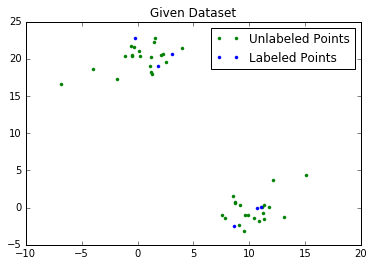

In [68]:
# generate two clusters: a with 20 points, b with 20 points
np.random.seed(4711)    # repeatable experiment

labeled = 3
unlabeled = 20
samples = 2*(labeled+unlabeled)

mean1 = [10,0]
mean2 = [0, 20]
cov = [[3, 1], [1, 3]]

# cluster 1
X1 = np.random.multivariate_normal(mean1, cov, size=labeled)
U1 = np.random.multivariate_normal(mean1, cov, size=unlabeled)
Y1 = np.ones(labeled)
YU1 = np.zeros(unlabeled)

# cluster 2
X2 = np.random.multivariate_normal(mean2, cov, size=labeled)
U2 = np.random.multivariate_normal(mean2, cov, size=unlabeled)
Y2 = np.ones(labeled)
YU2 = np.zeros(unlabeled)

X = np.concatenate((X1, X2),)
U = np.concatenate((U1, U2),)


fig, ax = plt.subplots()

ax.plot(U[:,0], U[:, 1], 'g.', label='Unlabeled Points')
ax.plot(X[:, 0], X[:, 1], 'b.', label='Labeled Points')
ax.set_title('Given Dataset')
plt.legend()
plt.show()

In [69]:
X = np.concatenate((X1, U1, X2, U2),)
Y = np.concatenate((Y1,YU1,Y2, YU2))
print('{n} samples with 2 dimensions:{shape}'.format(n=samples, shape=X.shape))

46 samples with 2 dimensions:(46, 2)


### Typical Laplacian Eigenmaps Contruction

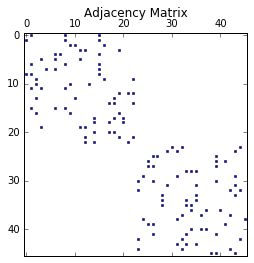

In [95]:
# find the knn neighbors
from sklearn.neighbors import kneighbors_graph

W = kneighbors_graph(X,n_neighbors=3,mode='distance')

# plot the matrix
fig, ax = plt.subplots()

ax.spy(W, precision=1E-5, markersize=2)
plt.title('Adjacency Matrix')
plt.show()

### Label Similarity Potential Matrix


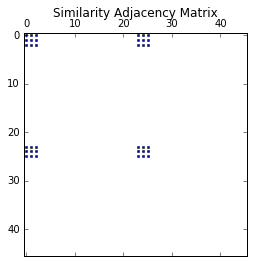

In [96]:
from manifold_learning.se import sim_potential
# new method for constructing the matrix
Ws1 = np.repeat(Y[:, np.newaxis], Y[:,].shape[0], axis=1)
Ws2 = np.repeat(Y[:, np.newaxis], Y[:,].shape[0], axis=1).T
Ws = np.zeros(np.shape(Ws1), dtype='int')
indices = np.where((Ws1==Ws2) & (Ws1>0) & (Ws2>0))
Ws[indices] = 1

# plot the matrix
fig, ax = plt.subplots()

ax.spy(Ws, precision=1E-5, markersize=2)
plt.title('Similarity Adjacency Matrix')
plt.show()

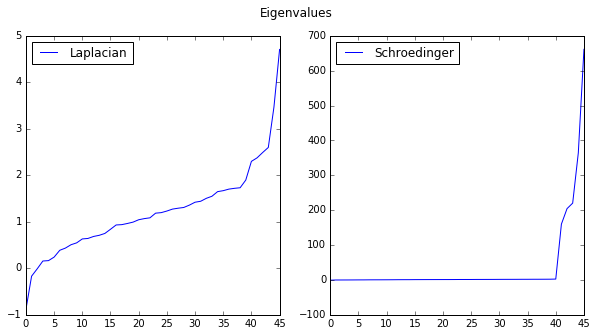

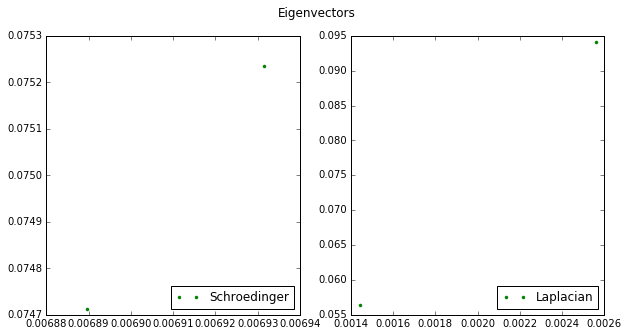

[[ 0.00691262  0.07485939 -0.0135457 ]
 [ 0.00693142  0.07523509 -0.01380162]
 [ 0.00688963  0.07471143 -0.01341369]]


In [94]:
#find the laplacian matrix for the original data and similarity matrix
D = np.diag(np.sum(W.toarray(),axis=1))
L = D-W.toarray()

Ds = np.diag(np.sum(Ws, axis=1))
V = Ds-Ws

# solve the eigenvalue problem
from scipy.linalg import eigh
alpha = 100.0

eigValsS, eigVecsS = eigh(a=L+alpha*V, b=D, 
                        eigvals=(0,L.shape[0]-1))
eigValsL, eigVecsL = eigh(a=L, b=D, 
                        eigvals=(0,L.shape[0]-1))

# plot the eigenvalues
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax[0].plot(eigVals, label='Laplacian')
ax[1].plot(eigValsS, label='Schroedinger')
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
plt.suptitle('Eigenvalues', fontsize=12)
plt.show()


# plot the embedding
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax[0].plot(eigVecsS[1:3, 0], eigVecsS[1:3, 1], 'g.',label='Schroedinger')
ax[1].plot(eigVecs[1:3, 0], eigVecs[1:3, 1], 'g.',label='Laplacian')
ax[0].legend(loc='lower right')
ax[1].legend(loc='lower right')
plt.suptitle('Eigenvectors', fontsize=12)
plt.show()

print(eigVecsS[0:3,0:3])

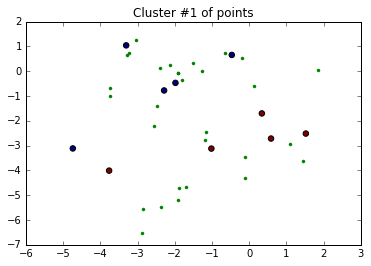

In [76]:
N = 5
U = 15
np.random.seed(seed=5)
mean1 = np.array([-2, 0], dtype='float')
mean2 = np.array([-1,-4], dtype='float')
cov = np.array(([2, .9], [.9, 2]), dtype='float')

X1class1 = np.random.multivariate_normal(mean1, cov, N)
X1class2 = np.random.multivariate_normal(mean2, cov, N)
X1 = np.vstack((X1class1, X1class2))
Y1 = np.ones((2*N,1), dtype='float')
Y1[N:,:] = 2

# Unlabeled Dataset
U1class1 = np.random.multivariate_normal(mean1,cov,np.int(U))
U1class2 = np.random.multivariate_normal(mean2,cov,np.int(U))
U1 = np.vstack((U1class1, U1class2))
Y1U = np.zeros((U,1), dtype='float')

fig, ax = plt.subplots()
ax.scatter(X1[:,0], X1[:,1], s=30, c=Y1)
ax.plot(U1[:,0], U1[:,1], 'g.')
ax.set_title('Cluster #1 of points')
plt.show()



In [ ]:
# find the knn neighbors
from sklearn.neighbors import kneighbors_graph

A = kneighbors_graph(X,n_neighbors=4,mode='distance')

# plot the matrix
fig, ax = plt.subplots()

ax.spy(A, precision=1E-5, markersize=2)
plt.show()

# graph representation
G = nx.from_numpy_matrix(A.toarray())
G.edges(data=True)
pos = nx.spring_layout(G)

fig, ax = plt.subplots()
nx.draw(G, pos)
plt.show()

G.edges

In [ ]:
L = nx.laplacian_matrix(G)
L_norm = nx.normalized_laplacian_matrix(G)
L_spectrum = nx.laplacian_spectrum(G)
A_spectrum = nx.adjacency_spectrum(G)

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(L_spectrum)

params = {}
nx.draw_spectral(G, **params)
plt.show()




In [ ]:
from sklearn.manifold import SpectralEmbedding

ml_model = SpectralEmbedding(n_components=2)
X_transform = ml_model.fit_transform(X)

fig, ax = plt.subplots()

ax.scatter(X_transform[:, 0], X[:, 1])
plt.show()